# Preprocessing

Importing necessary Python libraries and getting acquainted with the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('profiles.csv')
data.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

# Project Goal

According to the data, many users (23.49%) skipped the 'drugs' column, but it might be rather important for people to match a person with similar lifestyle. The goal of this project is to find out which features affect drug consuming and to predict if a certain user might be a drug user so this could be used to get better matches in future.

In [4]:
drugs_data = data[['age', 'body_type', 'drinks', 'orientation', 'job', 'sex', 'smokes', 'status', 'drugs']]
drugs_data.job = drugs_data.job.fillna('rather not say')
drugs_data = drugs_data.dropna()
drugs_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39427 entries, 0 to 59944
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          39427 non-null  int64 
 1   body_type    39427 non-null  object
 2   drinks       39427 non-null  object
 3   orientation  39427 non-null  object
 4   job          39427 non-null  object
 5   sex          39427 non-null  object
 6   smokes       39427 non-null  object
 7   status       39427 non-null  object
 8   drugs        39427 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.0+ MB


C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [5]:
x = drugs_data.drop(columns=['drugs'])
y = drugs_data.drugs

In [6]:
num_col_selector = selector(dtype_exclude=object)
cat_col_selector = selector(dtype_include=object)
num_columns = num_col_selector(x)
cat_columns = cat_col_selector(x)
preprocessor = ColumnTransformer([
    ('one-hot-encoder', OneHotEncoder(handle_unknown="ignore"), cat_columns), 
    ('standard-scaler', StandardScaler(), num_columns)])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [8]:
model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8351509003296982

In [9]:
data_to_predict = data[data.drugs.isna()]
data_to_predict = data_to_predict[['age', 'body_type', 'drinks', 'orientation', 'job', 'sex', 'smokes', 'status']]
predicted = model.predict(data_to_predict)
new_data = data.copy()

for row in range(len(data.drugs)):
    i = 0
    if new_data['drugs'][row] not in ['never', 'sometimes', 'often']:
        new_data['drugs'][row] = predicted[i]
        i += 1
    else:
        pass

C:\Users\user\AppData\Local\Temp/ipykernel_7424/3112429760.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['drugs'][x] = predicted[i]


In [10]:
print(new_data.info())
print(new_data.drugs.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        59946 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [78]:
print(drugs_data.sex[drugs_data.drugs == 'often'].value_counts(normalize=True))
print(drugs_data.sex[drugs_data.drugs == 'sometimes'].value_counts(normalize=True))
print(drugs_data.sex[drugs_data.drugs == 'never'].value_counts(normalize=True))
#print(drugs_data.drinks.value_counts())
#print(drugs_data.smokes.value_counts())
#print(drugs_data.sex.value_counts())

m    0.700549
f    0.299451
Name: sex, dtype: float64
m    0.658778
f    0.341222
Name: sex, dtype: float64
m    0.58329
f    0.41671
Name: sex, dtype: float64


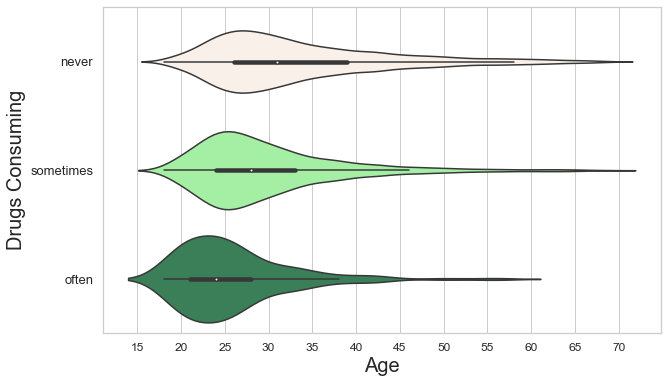

In [77]:
plt.figure(figsize=(10, 6))
my_pal = {'never': 'linen', 'sometimes': 'palegreen', 'often': 'seagreen'}
ax = sns.violinplot(data=drugs_data, x='age', y='drugs', palette=my_pal)
ax.set_xticks(np.arange(15, 75, 5))
ax.set_xticklabels(np.arange(15, 75, 5), fontsize=12)
ax.set_yticklabels(['never', 'sometimes', 'often'], fontsize=13)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Drugs Consuming', fontsize=20)
plt.show()

In [87]:
labels = ['Men', 'Women']
often = drugs_data.sex[drugs_data.drugs == 'often'].value_counts(normalize=True)
sometimes = drugs_data.sex[drugs_data.drugs == 'sometimes'].value_counts(normalize=True)
never = drugs_data.sex[drugs_data.drugs == 'never'].value_counts(normalize=True)

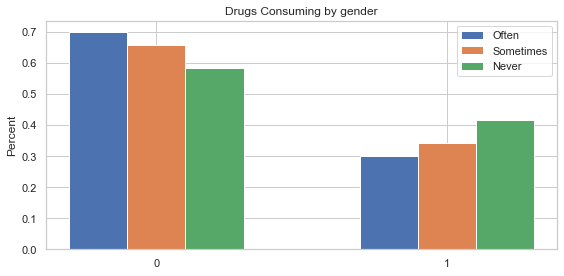

In [114]:
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 4))
rects1 = ax.bar(x - width, often, width, label='Often')
rects2 = ax.bar(x, sometimes, width, label='Sometimes')
rects3 = ax.bar(x + width, never, width, label='Never')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent')
ax.set_title('Drugs Consuming by gender')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()

In [97]:
x

array([0, 1])